## Avance 1. Análisis exploratorio de datos

### Clarificación de las Anotaciones de Bounding Box

En el contexto de este conjunto de datos, las anotaciones de las imágenes se realizan mediante 'bounding boxes' (cajas delimitadoras) rectangulares que encapsulan cada producto detectado. Cada bounding box se define por un conjunto de parámetros que especifican su posición, dimensiones y la categoría del producto asociado. A continuación, se detallan los términos utilizados para describir estas anotaciones:

*   **`x_i` (Coordenada X inicial):** Representa la coordenada horizontal del vértice superior izquierdo de la bounding box en el sistema de coordenadas de la imagen. Indica la posición de inicio del producto a lo largo del eje X.
*   **`y_i` (Coordenada Y inicial):** Denota la coordenada vertical del vértice superior izquierdo de la bounding box. Indica la posición de inicio del producto a lo largo del eje Y.
*   **`w_i` (ancho):** Cuantifica la extensión horizontal de la bounding box. Es la medida del ancho del producto tal como se visualiza en la imagen, expresada en píxeles.
*   **`h_i` (altura):** Cuantifica la extensión vertical de la bounding box. Es la medida de la altura del producto tal como se visualiza en la imagen, expresada en píxeles.
*   **`b_i` (identificador de clase/marca):** Corresponde a un identificador categórico que asocia la bounding box con una clase o marca específica de producto. Este atributo permite la clasificación de los objetos detectados.
*   **`bbox_area` (área de la bounding box):** Es una métrica derivada que representa la superficie total cubierta por la bounding box en la imagen. Se calcula mediante la multiplicación del ancho (`w_i`) por la altura (`h_i`), y proporciona una estimación del tamaño relativo del producto en el plano de la imagen.

  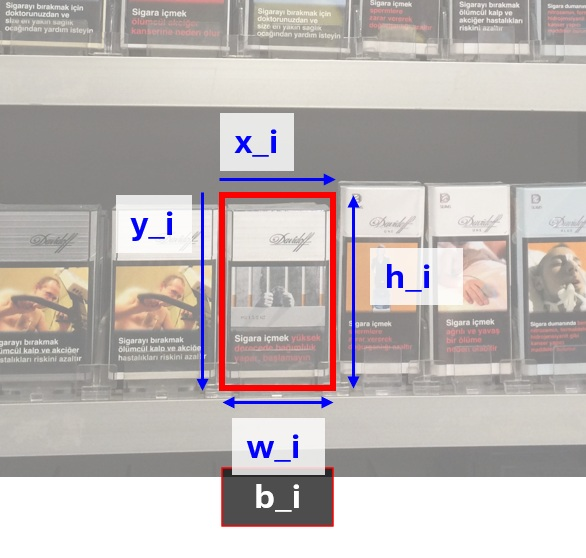

In [60]:
# ======================
# GroceryDataset — EDA
# ======================

# -----------------------------
# 0) Descarga dataset
# -----------------------------
!wget -q https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz
!tar xf GroceryDataset_part1.tar.gz
!wget -q https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz
!tar xf GroceryDataset_part2.tar.gz

!apt-get update -y
!apt-get install -y tree
!tree -L 2

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 3,917 B in 1s (3,323 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 up

In [61]:
# Carga de librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# lista de imágenes
try:
    from imutils import paths
except ImportError:
    !pip -q install imutils
    from imutils import paths

In [63]:
# Estilo visual de las gráficas0
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.8)
plt.rcParams.update({
    "figure.dpi": 220,
    "savefig.dpi": 300,
    "figure.figsize": (3.8, 2.6),
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7
})

def save_fig(name: str):
    """Guarda figura en PNG (paper-friendly)."""
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight")
    print(f"Saved: {name}")

In [64]:
# -----------------------------
# 1) Estructura del dataset (máx 10–15 líneas)
# -----------------------------
print("Estructura (resumen, máx ~15 líneas):")
!tree -L 2 | head -15

# Ruta esperada en releases
image_dir = "ShelfImages"
if not os.path.isdir(image_dir):
    # fallback: buscar carpeta con más imágenes
    candidates = []
    for root, _, files in os.walk("."):
        n = sum(f.lower().endswith((".jpg",".jpeg",".png")) for f in files)
        if n > 0:
            candidates.append((root, n))
    candidates.sort(key=lambda x: x[1], reverse=True)
    if candidates:
        image_dir = candidates[0][0]
        print(f"No se encontró 'ShelfImages'. Usar: {image_dir} (n={candidates[0][1]} imgs)")
    else:
        raise FileNotFoundError("No se encontraron imágenes en el entorno.")

# Se listan sólo 10 primeros nombres
all_imgs = list(paths.list_images(image_dir))
print("\nEjemplos de nombres de imagen (máx 10):")
print([os.path.basename(p) for p in all_imgs[:10]])
print("Total de imágenes encontradas:", len(all_imgs))

Estructura (resumen, máx ~15 líneas):
.
├── BrandImages
│   ├── 1
│   ├── 10
│   ├── 2
│   ├── 3
│   ├── 4
│   ├── 5
│   ├── 6
│   ├── 7
│   ├── 8
│   └── 9
├── BrandImagesFromShelves
│   ├── 1
│   ├── 10

Ejemplos de nombres de imagen (máx 10):
['C1_P02_N2_S2_1.JPG', 'C1_P06_N3_S3_1.JPG', 'C3_P01_N1_S2_1.JPG', 'C1_P01_N1_S2_1.JPG', 'C3_P03_N3_S2_1.JPG', 'C1_P02_N1_S3_1.JPG', 'C4_P07_N3_S3_1.JPG', 'C1_P12_N4_S2_1.JPG', 'C3_P04_N4_S2_1.JPG', 'C4_P02_N1_S3_2.JPG']
Total de imágenes encontradas: 354


In [65]:
# -----------------------------
# 2) Cargar anotaciones de archivo anotaciones.csv
# -----------------------------
cols = ["image_name", "x_i", "y_i", "w_i", "h_i", "b_i"]
df = pd.read_csv(
    "https://raw.githubusercontent.com/gulvarol/grocerydataset/master/annotations.csv",
    names=cols
)
df["bbox_area"] = df["w_i"] * df["h_i"]

print("\nResumen dataset:")
print("Anotaciones (rows):", len(df))
print("Imágenes únicas:", df["image_name"].nunique())
print("Clases/brands únicas (b_i):", df["b_i"].nunique())


Resumen dataset:
Anotaciones (rows): 13184
Imágenes únicas: 354
Clases/brands únicas (b_i): 11


In [66]:
# ==============================================
# Se muestran los 10 primeros registros del df
# ==============================================
df.head(10)

,image_name,x_i,y_i,w_i,h_i,b_i,bbox_area
0,C1_P01_N1_S2_1.JPG,1008,1552,1260,1928,0,2429280
1,C1_P01_N1_S2_1.JPG,1028,928,1280,1304,0,1669120
2,C1_P01_N1_S2_1.JPG,24,872,268,1264,0,338752
3,C1_P01_N1_S2_1.JPG,280,1568,532,1944,0,1034208
4,C1_P01_N1_S2_1.JPG,292,872,544,1248,0,678912
5,C1_P01_N1_S2_1.JPG,40,1560,292,1936,0,565312
6,C1_P01_N1_S2_1.JPG,528,900,780,1276,0,995280
7,C1_P01_N1_S2_1.JPG,536,1556,788,1932,0,1522416
8,C1_P01_N1_S2_1.JPG,768,1564,1020,1940,0,1978800
9,C1_P01_N1_S2_1.JPG,780,908,1032,1284,0,1325088


In [67]:
# ============================================================
# PREGUNTA 1:
# ¿Hay valores faltantes? ¿Patrones de ausencia?
# ============================================================
print("\n[P1] Missing values por columna:")
missing = df.isnull().sum().sort_values(ascending=False)
display(missing)

#plt.figure(figsize=(5.2, 2.4))
#sns.heatmap(df.isnull(), cbar=False)
#plt.title("Missingness Pattern (heatmap)")
#plt.xlabel("Columns")
#plt.ylabel("Rows")
#plt.tight_layout()
#plt.show()

# Justificación breve (para reporte)
if missing.sum() == 0:
    print("[P1] Conclusión: No se observan valores faltantes relevantes.")
else:
    print("[P1] Conclusión: Hay valores faltantes" & missing )


[P1] Missing values por columna:


,0
image_name,0
x_i,0
y_i,0
w_i,0
h_i,0
b_i,0
bbox_area,0


[P1] Conclusión: No se observan valores faltantes relevantes.


In [68]:
# ==============================================================
# PREGUNTA 2:
# ¿Cuáles son las estadísticas resumidas del conjunto de datos?
# ==============================================================
print("\n[P2] Estadísticas numéricas:")
display(df[["x_i","y_i","w_i","h_i","bbox_area"]].describe())

print("\n[P2] Estadísticas categóricas:")
display(df[["image_name","b_i"]].describe())


[P2] Estadísticas numéricas:


,x_i,y_i,w_i,h_i,bbox_area
count,13184.000000,13184.000000,13184.000000,13184.000000,1.318400e+04
mean,1315.445995,941.244539,1516.799075,1250.232858,1.946332e+06
std,818.098093,573.705674,833.175585,583.411658,1.538972e+06
min,0.000000,0.000000,100.000000,196.000000,1.960000e+04
25%,648.000000,412.000000,836.000000,752.000000,7.791400e+05
50%,1224.000000,916.000000,1420.000000,1208.000000,1.516856e+06
75%,1908.000000,1408.000000,2116.000000,1716.000000,2.712252e+06
max,4028.000000,2396.000000,4319.000000,2628.000000,9.508928e+06



[P2] Estadísticas categóricas:


,b_i
count,13184.000000
mean,0.837985
std,2.013757
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


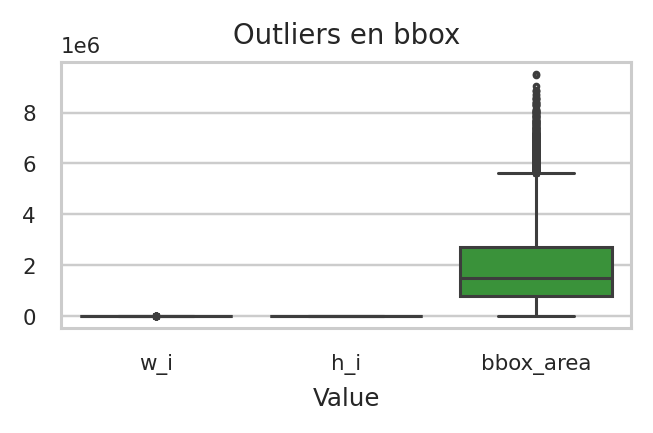


[P3] Cuantiles (para justificar outliers):


,w_i,h_i,bbox_area
0.01,204.0,300.0,125315.36
0.05,352.0,400.0,269647.20
0.95,3000.0,2280.0,5123152.80
0.99,3692.0,2404.0,6899321.92


[P3] Conclusión: Si los valores extremos impactan negativamente el análisis o el rendimiento del modelo, se recomienda aplicar un truncamiento (clipping) basado en percentiles (p1–p99).


In [69]:
# ============================================================
# PREGUNTA 3:
# ¿Hay valores atípicos en el conjunto de datos?
# ============================================================
# Se genera gráfica tipo boxplot para visualización de valores atípicos
plt.figure(figsize=(3.0, 2.0))
sns.boxplot(data=df[["w_i","h_i","bbox_area"]], orient="v", fliersize=1.5)
plt.title("Outliers en bbox")
plt.xlabel("Value")
plt.tight_layout()
plt.show()

# Cuantiles
q = df[["w_i","h_i","bbox_area"]].quantile([0.01, 0.05, 0.95, 0.99])
print("\n[P3] Cuantiles (para justificar outliers):")
display(q);

print("[P3] Conclusión: Si los valores extremos impactan negativamente el análisis o el rendimiento del modelo, se recomienda aplicar un truncamiento (clipping) basado en percentiles (p1–p99).")


[P4] Cardinalidad:
 - b_i (clases/brands) únicas: 11
 - image_name (imágenes) únicas: 354


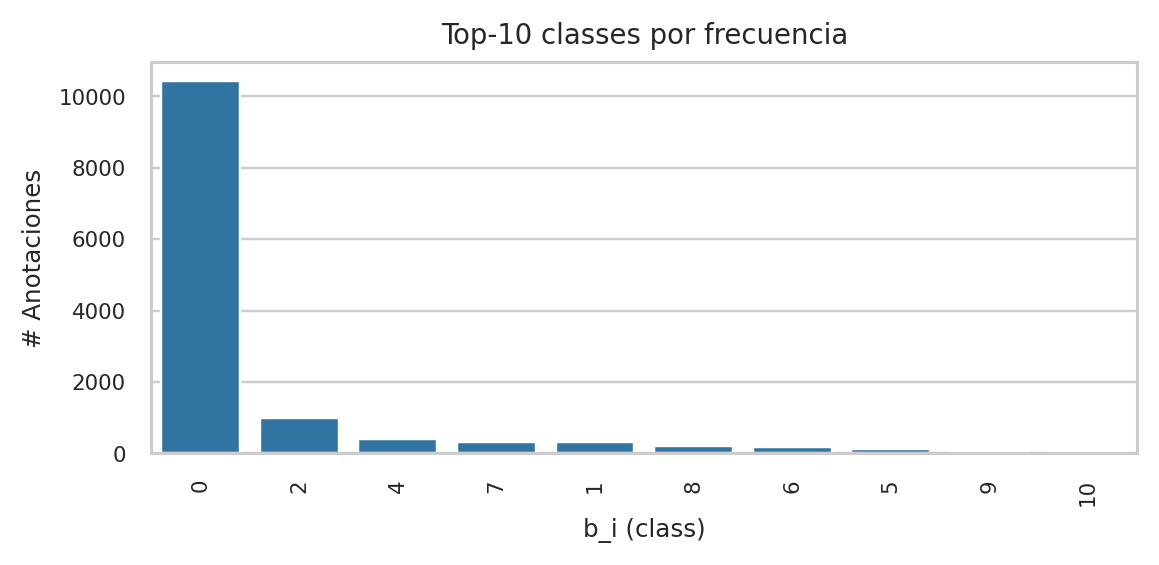

[P4] Conclusión: Alta cardinalidad puede requerir agrupar clases raras (other) o técnicas de balanceo/pesos.


In [70]:
# ============================================================
# PREGUNTA 4:
# ¿Cuál es la cardinalidad de las variables categóricas?
# ============================================================
n_classes = df["b_i"].nunique()
n_images = df["image_name"].nunique()

print(f"\n[P4] Cardinalidad:")
print(" - b_i (clases/brands) únicas:", n_classes)
print(" - image_name (imágenes) únicas:", n_images)

top_counts = df["b_i"].value_counts().head(10)
plt.figure(figsize=(5.3, 2.6))
sns.barplot(x=top_counts.index.astype(str), y=top_counts.values)
plt.title("Top-10 classes por frecuencia")
plt.xlabel("b_i (class)")
plt.ylabel("# Anotaciones")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("[P4] Conclusión: Alta cardinalidad puede requerir agrupar clases raras (other) o técnicas de balanceo/pesos.")

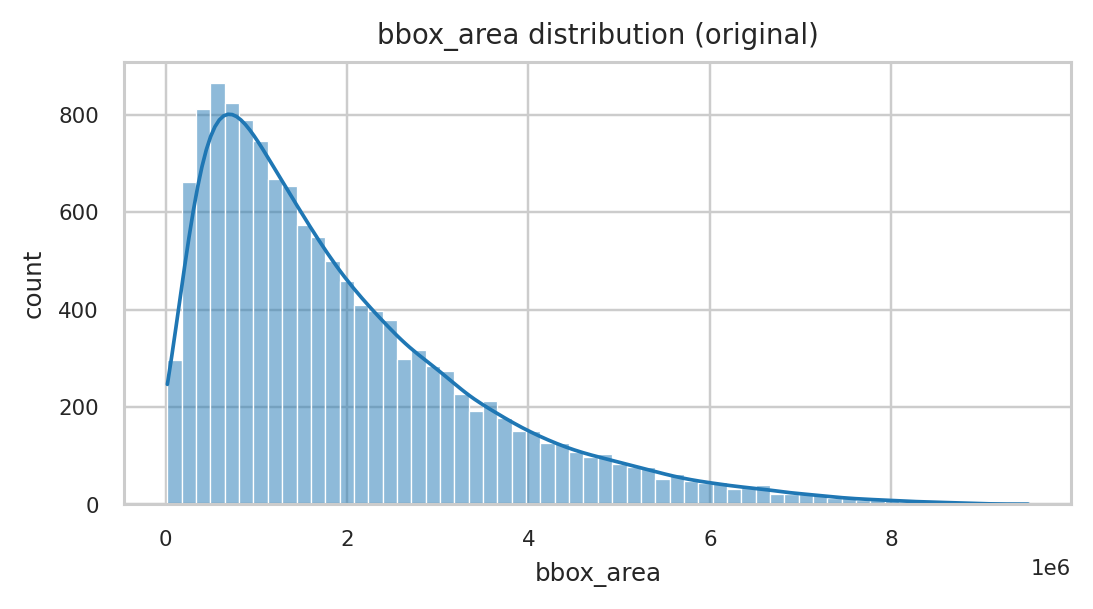

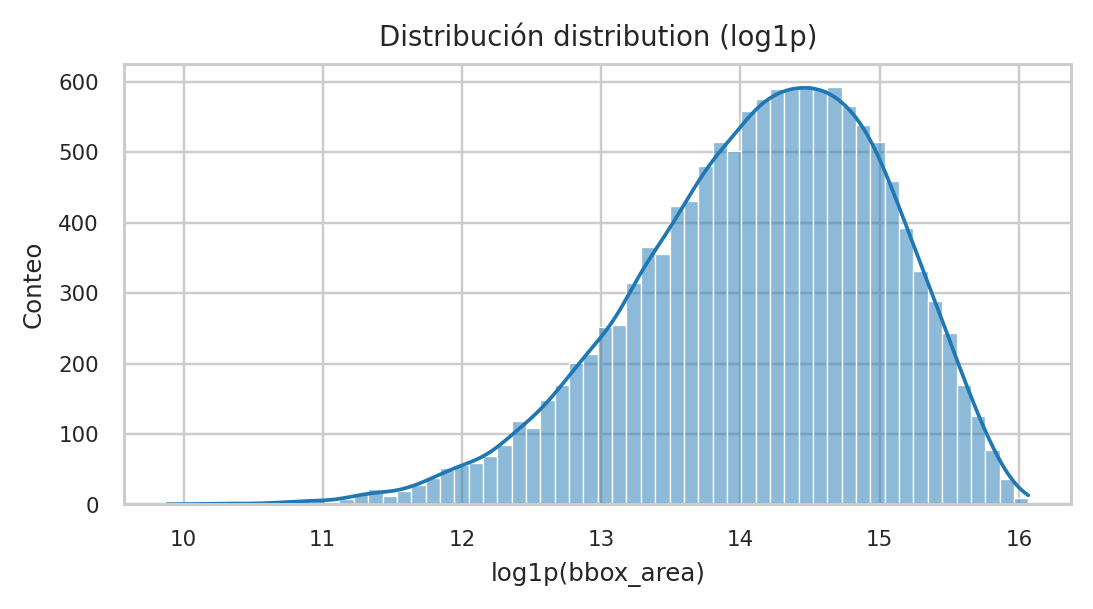

[P5] Conclusión: La distribución del área de las cajas delimitadoras (bbox_area) muestra un sesgo a la derecha. Aplicar una transformación logarítmica (log1p) ayuda a normalizar esta distribución, lo cual es beneficioso para el modelado estadístico y la visualización de datos.


In [71]:
# ============================================================
# PREGUNTA 5:
# ¿Existen distribuciones sesgadas? ¿Transformación no lineal?
# ============================================================
plt.figure(figsize=(5.0, 2.8))
sns.histplot(df["bbox_area"], bins=60, kde=True)
plt.title("bbox_area distribution (original)")
plt.xlabel("bbox_area")
plt.ylabel("count")
plt.tight_layout()
plt.show()

df["bbox_area_log"] = np.log1p(df["bbox_area"])

plt.figure(figsize=(5.0, 2.8))
sns.histplot(df["bbox_area_log"], bins=60, kde=True)
plt.title("Distribución distribution (log1p)")
plt.xlabel("log1p(bbox_area)")
plt.ylabel("Conteo")
plt.tight_layout()
plt.show()

print("[P5] Conclusión: La distribución del área de las cajas delimitadoras (bbox_area) muestra un sesgo a la derecha. Aplicar una transformación logarítmica (log1p) ayuda a normalizar esta distribución, lo cual es beneficioso para el modelado estadístico y la visualización de datos.")

In [72]:
# ============================================================
# PREGUNTA 6:
# ¿Tendencias temporales?
# ============================================================
print("\n[P6] Tendencias temporales:")
print("El dataset no incluye timestamps/fechas; por lo tanto, el análisis temporal NO aplica.")


[P6] Tendencias temporales:
El dataset no incluye timestamps/fechas; por lo tanto, el análisis temporal NO aplica.


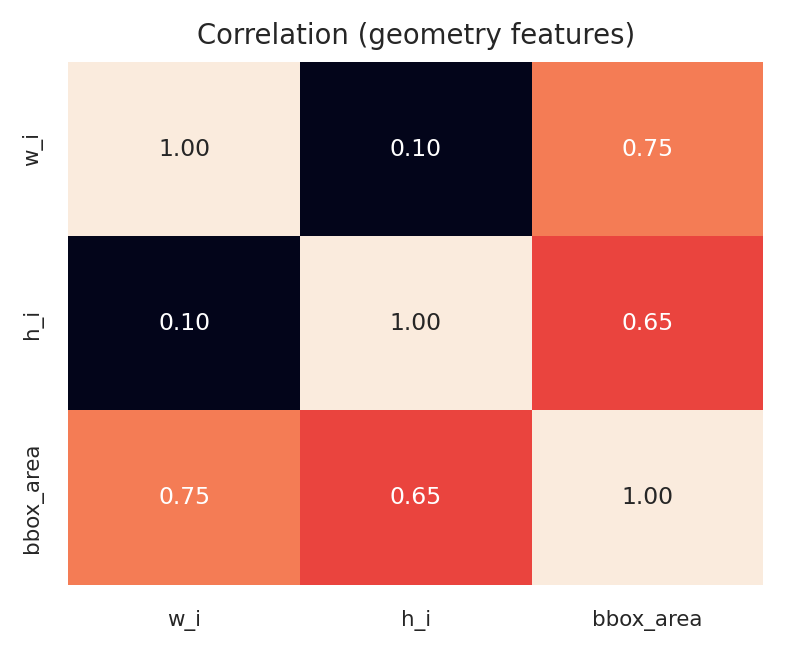

[P7] Conclusión: Correlación positiva entre w_i y h_i sugiere consistencia geométrica/escala en productos.


In [73]:
# ============================================================
# PREGUNTA 7:
# ¿Hay correlación entre variables dependientes e independientes?
# (Aquí: relación entre features numéricas)
# ============================================================
corr = df[["w_i","h_i","bbox_area"]].corr()

plt.figure(figsize=(3.6, 3.0))
sns.heatmap(corr, annot=True, fmt=".2f", cbar=False)
plt.title("Correlation (geometry features)")
plt.tight_layout()
plt.show()

print("[P7] Conclusión: Correlación positiva entre w_i y h_i sugiere consistencia geométrica/escala en productos.")

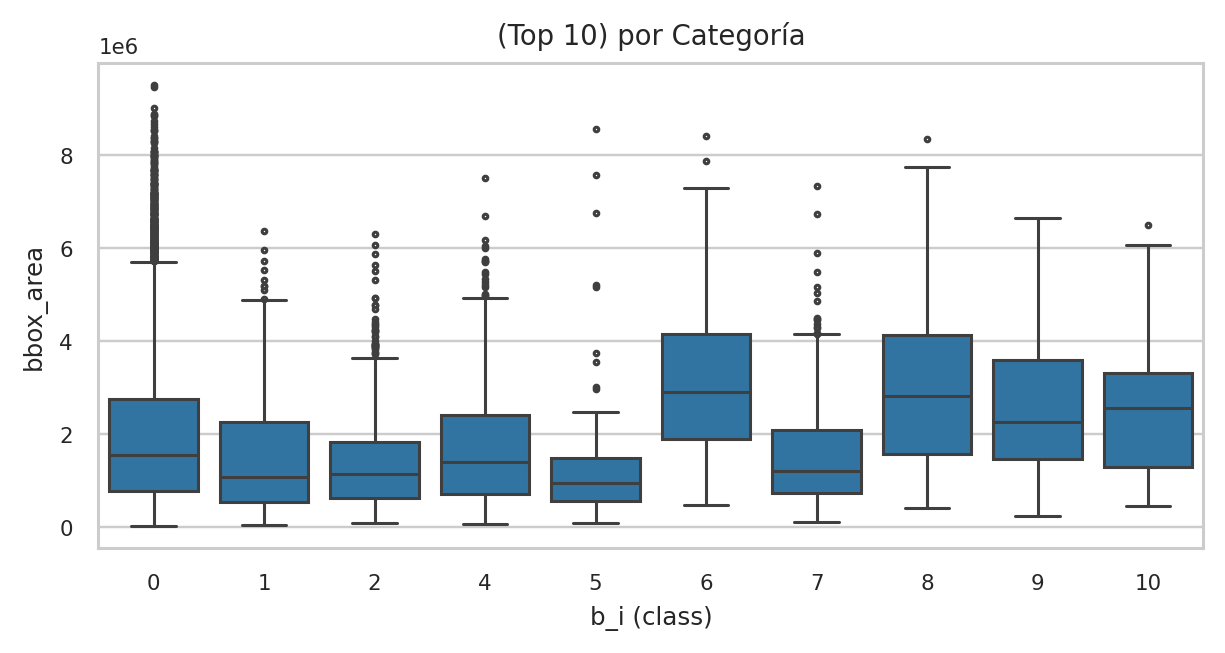

[P8] Conclusión: Las categorías muestran diferencias en escala (bbox_area), indicando necesidad de modelos robustos a escala.


In [74]:
# ============================================================
# PREGUNTA 8:
# ¿Cómo se distribuyen los datos por categorías? (bivariado)
# ============================================================

topN = 10
top_brands = df["b_i"].value_counts().head(topN).index
df_top = df[df["b_i"].isin(top_brands)].copy()

plt.figure(figsize=(5.6, 3.0))
sns.boxplot(x="b_i", y="bbox_area", data=df_top, fliersize=1.5)
plt.title(f"(Top {topN}) por Categoría")
plt.xlabel("b_i (class)")
plt.ylabel("bbox_area")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("[P8] Conclusión: Las categorías muestran diferencias en escala (bbox_area), indicando necesidad de modelos robustos a escala.")

In [75]:
# ============================================================
# PREGUNTA 9:
# ¿Se deberían normalizar las imágenes para visualizarlas mejor?
# Se agrega ejemplo visual al final posteriomente
# ============================================================
print("\n[P9] Normalización de imágenes:")
print("Se mostrará un ejemplo visual (raw vs normalized) en la sección final de exploración de imágenes.")


[P9] Normalización de imágenes:
Se mostrará un ejemplo visual (raw vs normalized) en la sección final de exploración de imágenes.


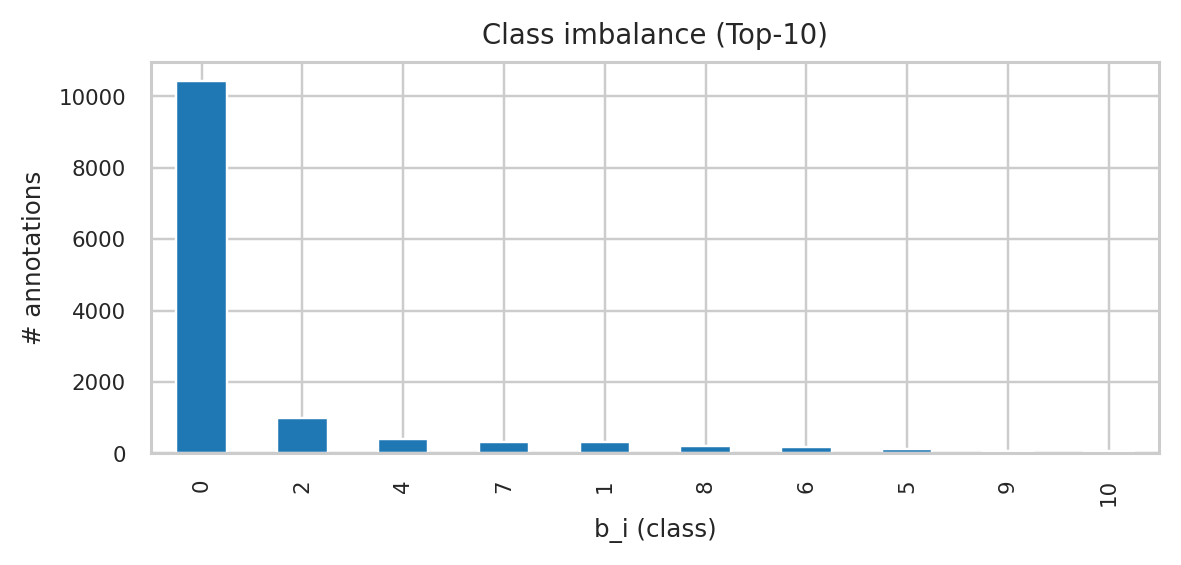


[P10] Métrica simple de desbalance (max/min): 155.82089552238807
[P10] Conclusión: Se ha identificado un desbalance significativo en la distribución de clases. Para abordar esta situación, es recomendable considerar la implementación de estrategias como la ponderación de clases (class weights), el uso de funciones de pérdida focal (focal loss), técnicas de re-muestreo (re-sampling) o la agrupación de clases minoritarias.


In [76]:
# ============================================================
# PREGUNTA 10:
# ¿Hay desequilibrio en clases de la variable objetivo?
# ============================================================
class_counts = df["b_i"].value_counts()
imbalance_ratio = class_counts.max() / class_counts[class_counts > 0].min()

plt.figure(figsize=(5.4, 2.6))
class_counts.head(10).plot(kind="bar")
plt.title("Class imbalance (Top-10)")
plt.xlabel("b_i (class)")
plt.ylabel("# annotations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\n[P10] Métrica simple de desbalance (max/min):", float(imbalance_ratio))
print("[P10] Conclusión: Se ha identificado un desbalance significativo en la distribución de clases. Para abordar esta situación, es recomendable considerar la implementación de estrategias como la ponderación de clases (class weights), el uso de funciones de pérdida focal (focal loss), técnicas de re-muestreo (re-sampling) o la agrupación de clases minoritarias.")

In [77]:
# ============================================================
# PREPROCESAMIENTO (propuesto + justificado)
# Missing / Outliers / Alta cardinalidad
# ============================================================
print("\n=== Preprocesamiento propuesto ===")

# Missing values
if df.isnull().any().any():
    print("- Valores Ausentes: En caso de detectar valores ausentes, se sugiere evaluar su imputación o la eliminación de los registros afectados, priorizando la imputación para minimizar la pérdida de información.")
else:
    print("- Valores Ausentes: No se identifican valores ausentes significativos, por lo que no se requiere una intervención específica en esta etapa.")

# Outliers (clipping recomendado, NO aplicado por defecto)
p01, p99 = df["bbox_area"].quantile(0.01), df["bbox_area"].quantile(0.99)
print(f"- Valores Atípicos: Se aconseja la aplicación de un truncamiento (clipping) en la variable `bbox_area` dentro del rango [p01={p01:.2f}, p99={p99:.2f}], en caso de que los valores extremos comprometan la robustez del análisis o el desempeño del modelo.")

# High-cardinality
print(f"- Cardinalidad Elevada: La variable `b_i` presenta {n_classes} clases únicas. Para su manejo, se pueden considerar estrategias como la agrupación de clases minoritarias, la selección de las K clases más frecuentes (top-K), la aplicación de ponderaciones de clase (class weights) o técnicas de embedding.")


=== Preprocesamiento propuesto ===
- Valores Ausentes: No se identifican valores ausentes significativos, por lo que no se requiere una intervención específica en esta etapa.
- Valores Atípicos: Se aconseja la aplicación de un truncamiento (clipping) en la variable `bbox_area` dentro del rango [p01=125315.36, p99=6899321.92], en caso de que los valores extremos comprometan la robustez del análisis o el desempeño del modelo.
- Cardinalidad Elevada: La variable `b_i` presenta 11 clases únicas. Para su manejo, se pueden considerar estrategias como la agrupación de clases minoritarias, la selección de las K clases más frecuentes (top-K), la aplicación de ponderaciones de clase (class weights) o técnicas de embedding.



=== Exploración cualitativa de imágenes (muestra pequeña) ===


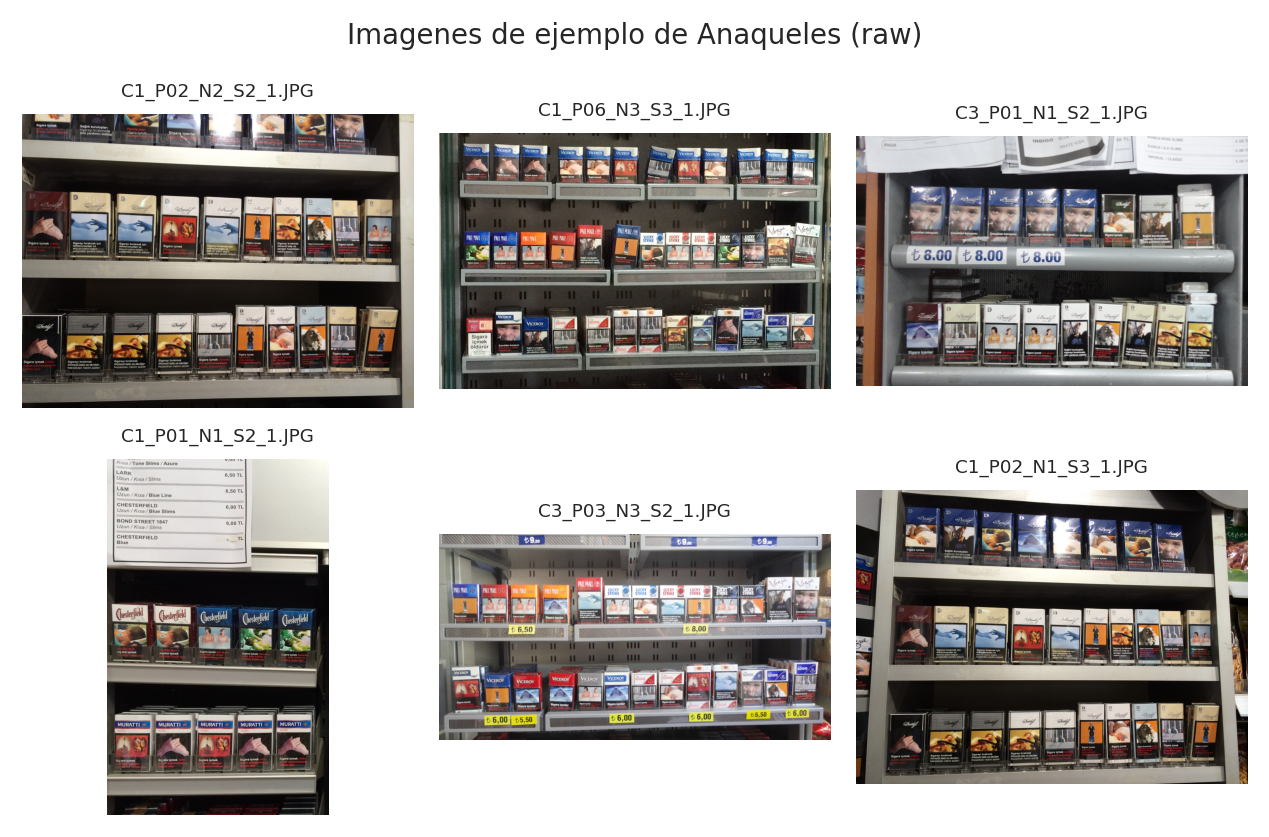

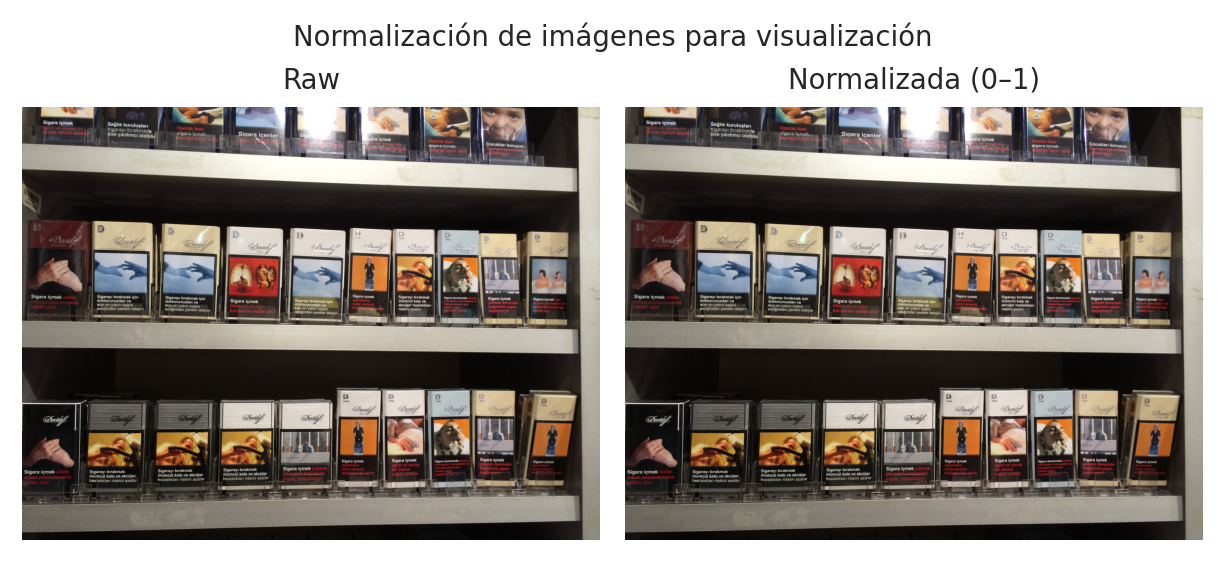

[P9] Conclusión: La normalización de las imágenes, escalando sus valores de píxeles a un rango de [0,1], contribuye a una mayor uniformidad visual para el entrenamiento de Redes Neuronales Convolucionales (CNNs).


In [78]:
# ============================================================
# EXPLORACIÓN CUALITATIVA DE IMÁGENES (AL FINAL)
# (para entender tipo de imágenes y estructura)
# ============================================================
print("\n=== Exploración cualitativa de imágenes (muestra pequeña) ===")

# Muestra pequeña (6 imágenes) para paper
sample_paths = all_imgs[:6]

plt.figure(figsize=(5.8, 3.8))
for i, p in enumerate(sample_paths):
    img = plt.imread(p)
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p), fontsize=6)
plt.suptitle("Imagenes de ejemplo de Anaqueles (raw)", y=0.98, fontsize=9)
plt.tight_layout()
plt.show()

# Normalización: raw vs normalized (1 imagen)
p0 = sample_paths[0]
img = plt.imread(p0)

# normalizar robusto
if img.dtype != np.float32 and img.dtype != np.float64:
    img_norm = img.astype(np.float32) / 255.0
else:
    img_norm = img

plt.figure(figsize=(5.6, 2.6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Raw")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_norm)
plt.title("Normalizada (0–1)")
plt.axis("off")

plt.suptitle("Normalización de imágenes para visualización", y=0.98, fontsize=9)
plt.tight_layout()
plt.show()

print("[P9] Conclusión: La normalización de las imágenes, escalando sus valores de píxeles a un rango de [0,1], contribuye a una mayor uniformidad visual para el entrenamiento de Redes Neuronales Convolucionales (CNNs).")

In [79]:
# ============================================================
# CONCLUSIONES:
# ============================================================
print("\n=== Conclusiones (lista para reporte) ===")
print("1) Missing: ausencia no relevante (o tratar según columnas).")
print("2) Resumen: bbox features muestran variación de escala.")
print("3) Outliers: existen extremos; clipping por percentiles es justificable.")
print("4) Cardinalidad: alta en b_i; puede requerir agrupación/ponderación.")
print("5) Sesgo: bbox_area es sesgada; log1p recomendado.")
print("6) Temporal: no aplica (sin timestamps).")
print("7) Correlación: w_i y h_i correlacionan; consistencia geométrica.")
print("8) Bivariado: diferencias de escala por clase.")
print("9) Imágenes: variación realista de iluminación/oclusión; normalización útil.")
print("10) Desbalance: fuerte; requiere estrategias para entrenamiento futuro.")



=== Conclusiones (lista para reporte) ===
1) Missing: ausencia no relevante (o tratar según columnas).
2) Resumen: bbox features muestran variación de escala.
3) Outliers: existen extremos; clipping por percentiles es justificable.
4) Cardinalidad: alta en b_i; puede requerir agrupación/ponderación.
5) Sesgo: bbox_area es sesgada; log1p recomendado.
6) Temporal: no aplica (sin timestamps).
7) Correlación: w_i y h_i correlacionan; consistencia geométrica.
8) Bivariado: diferencias de escala por clase.
9) Imágenes: variación realista de iluminación/oclusión; normalización útil.
10) Desbalance: fuerte; requiere estrategias para entrenamiento futuro.
